# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smartcab is being located randomly in a different location of the defined world (environment) in each trial and its rewards s being calculated based on taking no action by driving agent in the consciously changing status of the traffic. At the end of each trial the calculated sum of the negative and positive rewards would determine if the trial was a failure or success.

•So the Smartcab does not move at all during the simulation as the driving agent is not taking any action, but its location is being changed for each new trial.

•The driving agent receiving positive rewards by taking no action on a red light and on a green light with oncoming traffic. The agent receive negative rewards by taking no action on green light with no oncoming traffic.

•The light changing color affects the rewards in this simulator if taking no action causes minor traffic violation like not moving when the light is changed to green and there is no oncoming traffic (negative rewards). Other than that taking no action when the light is red or there is oncoming traffic but light is green, the driving agent receives positive rewards.




### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.

    
    
* epsilon - continuous value for the exploration factor, default is 1. This flag is tuning mechanism to increase the ratio of exploitation to exploration. We use ϵ−Greedy to prevent stuck into local optimal and let our smartcab work smarter and more efficient within its finite trials. 
This refers to an e-greedy implementation. Therefore we can randomly explore with the probability of some random action. As a very simple exploration strategy:

        • On each step:
         ◦ With probability e select a random action, and         
         ◦ with probability 1- e select a greedy action
 


 
* alpha   - continuous value for the learning rate. The learning rate or step size determines to what extent the newly acquired information will override the old information. A factor of 0 will make the agent not learn anything, while a factor of 1 would make the agent consider only the most recent information.
    
* tolerance  - epsilon tolerance before beginning testing. This flag determines the threshold for decayed value for epsilon after which the training trail will stop and testing trail starts.
    

•In the environment.py Python file, what Environment class function is called when an agent performs an action?

    def act(self, agent, action):
        """ Consider an action and perform the action if it is legal.
            Receive a reward for the agent based on traffic laws. """



•In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?

The 'render_text()' function is the non-GUI render display, while the 'render()' function is the GUI render display of the simulation.
 
            
•In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?

The 'next_waypoint() function will consider the East-West direction first and then North-South. or 


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

# Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


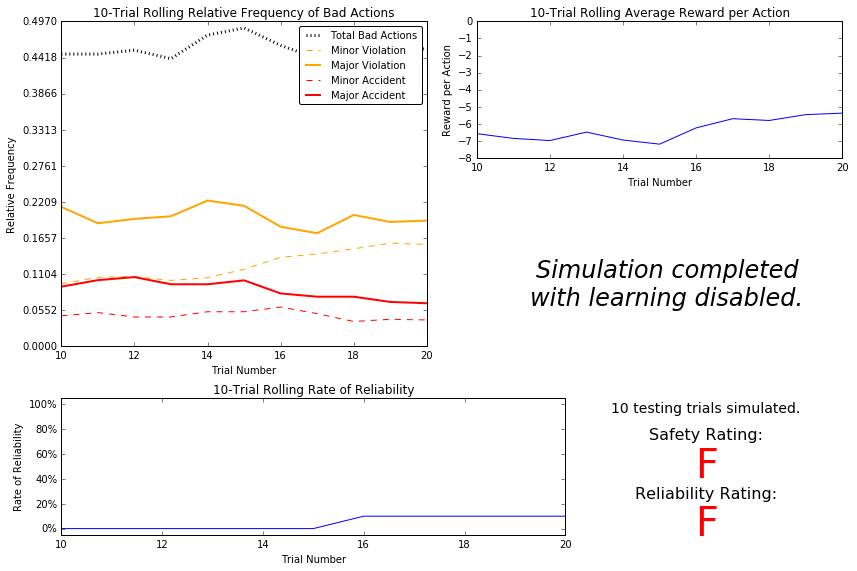

In [39]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')


### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

Based on my observation on the initial simulation and analyzing the codes, we have a stochastic environment in which a mathematical object (action) usually defined as a collection of random variables (states). This would play a very important role on how we model our driving agent Q-learning algorithm and parameters. 


• The driving agent is making bad decisions almost %50 of the times (0.4418 ~ 0.4970) from which about %15 are Minor and Major Accidents.

• The rate of reliability for all trials is below %10 when the agent is driving randomly, so it absolutely unacceptable rate fr reliability.

• The agent is receiving negative rewards for its wrong decisions and positive rewards for its right decisions. Since according to the Reward per Action graph, the agent is continuously in the range of -5 to -7 rewards range, it indicates that the agent was heavily penalized for its actions and even the few correct decisions and positive rewards couldn’t help to increase its rewards. 

• Although as the number of trials increases the Rate of Reliability and Reward per Action increase and the Major/Minor Accidents relative frequency decrease, the outcome of results does not change significantly according to the visualization results. That is why the Safety and Reliability Ratings are failing with F score. 


• This Smartcab would not be considered safe and or reliable for its passengers because the Safety and Reliability Ratings are failing with F score according to the visualization results.




-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

The 'inputs' features available to the agent are most relevant for learning both safety and efficiency, because by putting appropriate modeling for the Smartcab based on these features' conditions, the agent can avoid bad actions and it will make it possible for the agent to reach the destination before the deadline.
The 'waypoint' and 'deadline' features are only relevant to efficiency but not specifically to the safety.
But in order to model the Smartcab appropriately, I would add ‘waypoint’ to the 'inputs' for defining the state in order to fulfill both safety and efficiency.

Although 'deadline' might have some positive effect on efficiency if setup with proper algorithm, it will increase the state space which will increase the amount of learning trials exponentially. This is the so called curse of dimensionality that would cause a very long learning time q-matrix convergence.

Besides, since the destinations are being selected randomly in the environment.py, there is no way to consider any specific deadline at each state. For these reasons I would exclude this feature from the state model.

Another possibility with including the deadline could possibly influence the agent in making illegal moves when the deadline is near.




### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

I have selected 'waypoint' and 'inputs' features for modeling the state. Although the 'waypoint' state can have 4 possibilities (None, 'forward', 'left', 'right'), but the ‘None’ option would only be a valid option for next_waypoint if the agent is in the destination. So we can remove it from the possible options of the 'waypoint': 


'waypoint'= ['forward', 'left', 'right'] #3 possibilities

'inputs' = {
    'light': TrafficLight.valid_states, #2 possibilities    
    'oncoming': valid_actions, #4 possibilities    
    'left': valid_actions, #4 possibilities    
    'right': valid_actions} #4 possibilities



The size of the state space for 'waypoint' and 'inputs' would be 4 x 2 x 4 x 4 x 3 = 384 but for 'inputs' alone is 128. So I think the driving agent would need at least 384 training trials in order to be able to learn an effective policy through which it could satisfy the safety and efficiency in a reasonable rate, but we cannot have too much time spending for learning phase and need to find an optimum level of training trials.

By considering that all the states are uniformly and randomly distributed, we can use the Monte Carlo simulation () to estimate required number of tests that could assure us that we cover all 384 states. the following Monte Carlo simulation() shows that the chance of visiting all states in 400 steps is 0.9995, so if we can fine tune the parameters like epsilon, alpha, and tolerance in Q-learning in order to have at least 400 or more trials, then we could be sure that all states are visited and we most possibly been able to have the driving agent has a acceptable Q-learning.



In [45]:
from sets import Set
from random import choice

def chance_of_visiting_all_states(iterations, k, n):
    r = range(n)
    total = 0
    for i in range(iterations):
        s = Set()
        for j in range(k):
            s.add(choice(r))
            if len(s) == n:
                total +=1
                break
    return float(total)/iterations

steps = 400
print "Chance of visiting all states in {st} steps: {ch}".format(st = steps, ch = chance_of_visiting_all_states(2000, steps, 38))


Chance of visiting all states in 400 steps: 0.9985


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

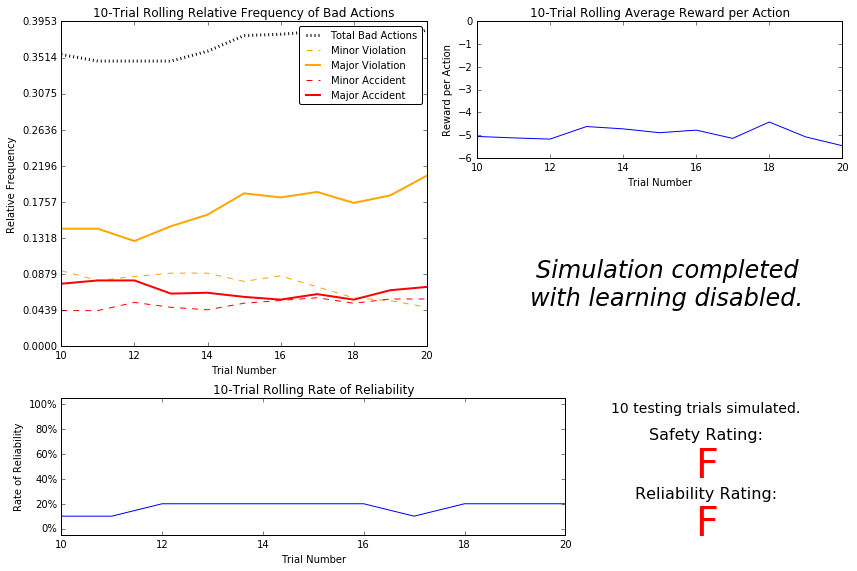

In [44]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

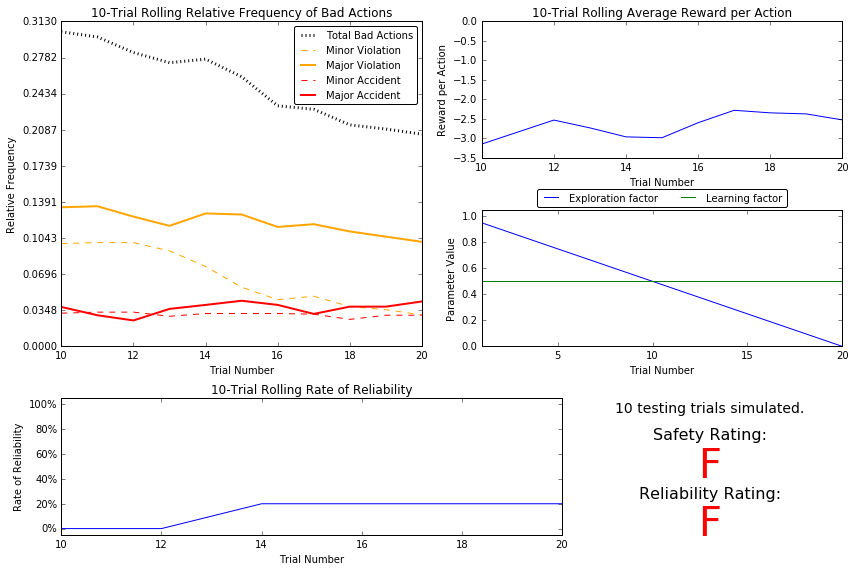

In [54]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Unlike basic agent initial simulation results on Question-3 that there were no learning involved, the results from the initial Q-Learning implementation shows some signs of learning progress for the agent that causes decrease in overall Bad Actions. We also could see better results for Rate of Reliability (up to %20) and Reward per Action (within -3.0 to -2.5). Since the agent continues the learning with more trials, it is getting a bit better. With a decaying epsilon, we can reduce the chances of random exploration over time, as we can get the best of both exploration vs exploitation.

Thus maybe with a slower decay rate and with more training trails, this default Q-Learning driving agent could actually improve and explore and learn more states. But for now we can use this agent as a good benchmark.


• The Major Violation and Major accident observations show a total decrease but the trend is the same in both the basic driving agent and the default Q-Learning agent by staying in a flat trend.

• With decay function (ϵ t+1 =ϵ t −0.05), there will be 20 training trials the driving agent required before testing. That number would not change by different values of epsilon-tolerance.

• The decaying function I implemented for ϵ  (ϵ t+1 =ϵ t −0.05) accurately represented in the parameters panel by showing (epsilon = 1- 0.05*t) for each trial number(t).

• The number of bad actions decreased almost %33 (from 0.3130 to 0.2087) as the number of training trials increased. And the average reward increased almost %20 (from -3.1 to -2.5).

• The safety and reliability rating compare to the initial driving agent improved based on the results of the above visualization, but we are still at F grade for both of those factors especially, there are not much progress on Major Accident and Major Violation after training trials.



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

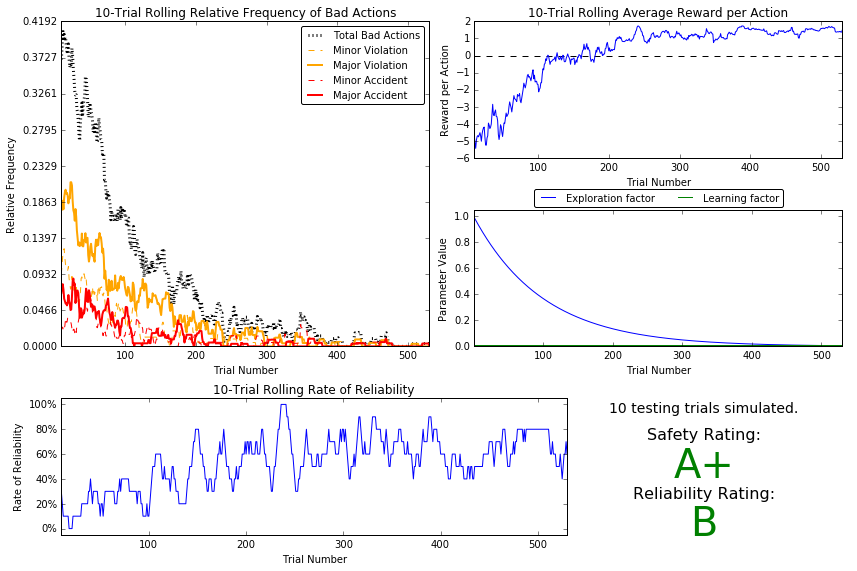

In [69]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

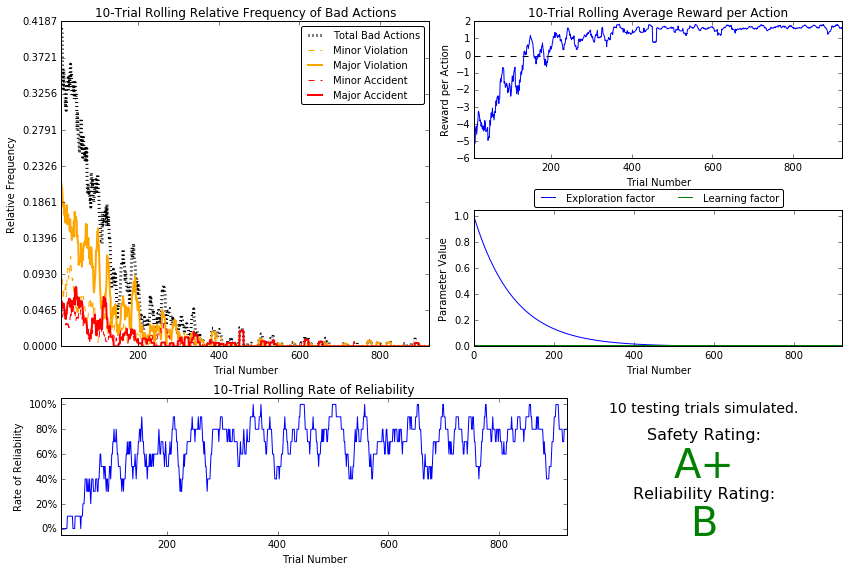

In [87]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

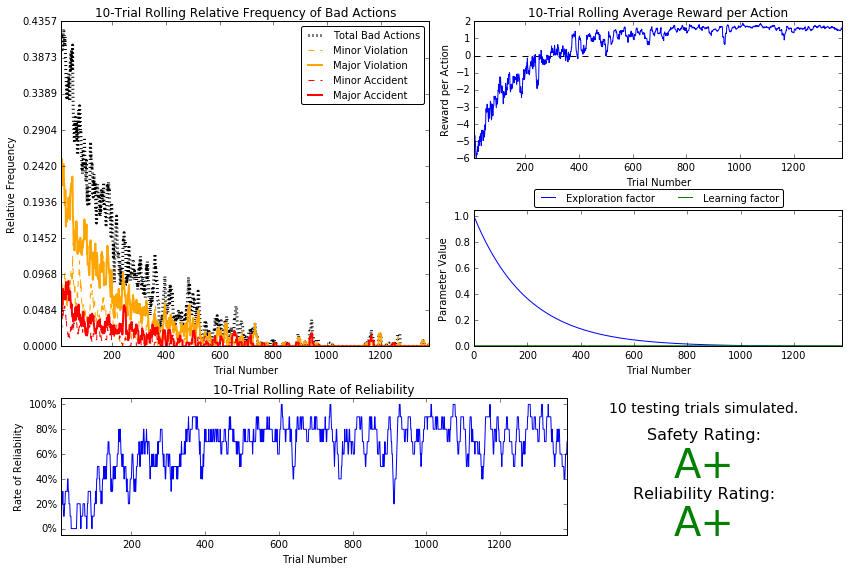

In [110]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

As previously calculated in Question 5, the state space of 384 requires at least similar amount of training trials for the agent to learn the policy for acceptable Safety and Reliability ratings. The observation results above are based on different value adjustments for alpha and tolerance values in order to get acceptable scores. They show exact same concept since the Relative Frequency for Total Bad Actions start reducing to almost 0.0 after 400 trials(as we calculated with Monte Carlo Simulation in Question 5). Similar observation can be concluded for the Average Reward per Action that reaches to a steady level above 1. The Rate of Reliability also stays around 70% which might have some room for improvement. 

• I used following decaying function for epsilon (for t , the number of trials):

        ϵ=e −at, for 0<a<1
        
• Approximately minimum of 500 training trials were needed for the agent before beginning testing ( As predicted during previously the state space calculation of 384).

• I used epsilon= 1.0, tolerance = 0.001 and alpha =0.005 in order to make sure we get the minimum of 500 training trials before beginning testing.


• There was a significant improvement with this Q-Learner when compared to the default Q-Learner from the previous section by jumping from F to A+ for both Safety and Reliability Scores.   

• I would say that the Q-Learner results show that my driving agent successfully learned an appropriate policy for a very good Safety and Reliability Ratings.

• I am satisfied with the safety and reliability ratings of the Smartcab even if it took a lot of training trials to get to the A+ scores for both criteria. This is required in the training phase to more explore, learn and fill up the Q-values properly which means more confident agent. There might be some room for improvement by further tuning epsilon decaying rate, alpha decaying methods, and tolerance in order to achieve similar scores with less training trials and shorter time for agent to learn optimally.

Here might be some ideas:

• Keeping epsilon higher(near 1) for a much longer amount of time. As this is the best approach for the agent, as this could help using less training trails. This would be an interesting one to check out(reversed sigmoid)

    self.trial_count = self.trial_count + 1
    self.epsilon = 1 - (1/(1+math.exp(-k*self.alpha*(self.trial_count-t0))))

    ◦Where k determines how fast the agent performs the transition between random learning and choosing the max q-value. k also determines how fast the sigmoid function converges to 0.
    ◦The t0 value was also chosen empirically; by using the sigmoid function, we can make sure that the agent would have sufficient time to explore the environment completely randomly, in order also to fill the Q-value matrix with the correct values.

• Could even omit one of these inputs, as it is not needed based on US/UK traffic laws. As this would greatly reduce the size of the state space. 
• Another idea to play around with would be alpha decay and reduce the learning rate over time. Thus as time elapses, the agent becomes more confident with what it's learned in addition to being less persuaded by the information.





### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
### Optimal policy examples
1)
state= (('waypoint', 'left'), ('oncoming', None), ('light', 'green'), ('left', None), ('right', None))
Optimal policy = 'left'

2)
state= (('waypoint', 'forward'), ('oncoming', 'forward'), ('light', 'green'), ('left', 'left'), ('right', 'right'))
Optimal policy = 'forward'

3)
state= (('waypoint', 'forward'), ('oncoming', 'forward'), ('light', 'green'), ('left', 'left'), ('right', 'forward'))
Optimal policy = 'forward'

4)
(('waypoint', 'right'), ('oncoming', None), ('light', 'red'), ('left', 'left'), ('right', None))
Optimal policy = 'right'

### improved Q-Learning algorithm examples
1)
(('waypoint', 'left'), ('oncoming', None), ('light', 'green'), ('left', None), ('right', None))
 -- forward : 0.14
 -- None : -0.89
 -- right : 0.13
 -- left : 1.76

2)
(('waypoint', 'forward'), ('oncoming', 'forward'), ('light', 'green'), ('left', 'left'), ('right', 'right'))
 -- forward : 0.00
 -- None : -0.04
 -- right : 0.00
 -- left : 0.00
 
 
3)
 (('waypoint', 'forward'), ('oncoming', 'forward'), ('light', 'green'), ('left', 'left'), ('right', 'forward'))
 -- forward : 0.00
 -- None : -0.05
 -- right : 0.05
 -- left : 0.00

4)
(('waypoint', 'right'), ('oncoming', None), ('light', 'red'), ('left', 'left'), ('right', None))
 -- forward : -0.40
 -- None : 0.05
 -- right : 0.69
 -- left : -0.69
 
 
For the above four examples each state that has been recorded from the simulation is compared with optimal policies. The policy (the action with the highest value) for sample 1 matches with optimal choice (left : 1.76)
Because the light is green and the next waypoint is left, so since there is no oncoming, left or right car to interfere with next move to the left direction, then the optimal choice will be left and it has the highest score of 1.76 which makes the policy choice the same as optimal choice.

, sample 2 has 33% chance of matching with optimal choice, because the policy is choosing randomly the options with same maxQ value (forward : 0.00; None : right : 0.00; left : 0.00). So it is a sub-optimal state and more trials would be needed to be learned by agent in order to fill up the 0.0 Q-values and make it possible for the agent to choose the optimal choice by selecting maximum Q-value.

Samples 3 is choosing wrong policies compare to optimal choices. It is a sub-optimal state and with higher epsilon and more trial training would be corrected through the course of further trainings.

Sample 4 is matching with optimal choice by considering the US/UK traffic laws where the right turn on red light is allowed if there is no traffic coming from the left (if inputs['left'] != 'forward').

Another idea to think about based on what an optimal policy might be:

    • when the agent is blocked by a red light or traffic, the best course of action is always to wait until they can follow the waypoint. However, it is often the case that they could be taking alternate routes that decrease the distance to the goal (proceeding along the step-wise diagonal path to the goal). A vector waypoint system could greatly aid navigation by rewarding paths that decrease the 2D distance to the goal instead of just rewarding following a single waypoint. In general, it may also be the case that patterns in traffic signals can be learned, but not in this environment.




-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

self.Q[self.prev_state][self.prev_action] = ((1 - alpha)* self.Q[self.prev_state][self.prev_action]) +  alpha * (self.future_reward + gamma *maxQ[self.future_state][self.future_actions])

The use of future rewards in the Q-Learning algorithm is not needed due to the way we considered the state for this project. For the smartcab, the next_waypoint has already been calculated and suggested, so we can make the algorithm based on that assumption. 

The other characteristic in the state is the inputs that are all about immediate conditions that are not predictable. Because the agent is in an environment that is not aware of the whole grid and needs to make decision based on the calculated distance to the destination at each moment and each state.
The destination itself also is continusely changing in this environment, hence there is no way to establish a mechanisem to calculate future rewards when the destination is randomly changing. We can see that From the environment.py file(line 119)

        # Pick a start and a destination
        start = random.choice(self.intersections.keys())
        destination = random.choice(self.intersections.keys())
        
        
        
   • For the smartcab itself, we note that it has only an egocentric view of the world, and hence has no context regarding its distance from the goal. A smartcab that is 5 intersections away from the destination, and a smartcab that is 1 intersection away from the destination both have the same understanding of state (perhaps with the exception of deadline, but that does not aid in understanding distance from the goal). Hence, it’s impossible to propagate rewards away from the goal towards specific high-value states since it’s unclear which states represent “closeness” to the goal.
   
   • The second issue is that the destination itself moves after every trial. If the smartcab had a localized view of the environment, and we attempted to propagate reward away from the goal, we would eventually (given enough trials), propagate reward away from every intersection, and hence would effectively not be making use of knowing where the goal is at all.




> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.